## Lesson 4. Dissolve Polygons Using Geopandas

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib.colors import ListedColormap
import seaborn as sns
from shapely.geometry import box
import geopandas as gpd
import earthpy as et

In [2]:
sns.set(font_scale=1.5, style='white')

In [3]:
data_path = et.data.get_data('spatial-vector-lidar')

In [4]:
country_bdy_us = gpd.read_file(os.path.join(data_path,
                                            'usa',
                                            'usa-boundary-dissolved.shp'))
state_bdy_us = gpd.read_file(os.path.join(data_path,
                                          'usa',
                                          'usa-states-census-2014.shp'))
pop_places = gpd.read_file(os.path.join(data_path,
                                        'global',
                                        'ne_110m_populated_places_simple',
                                        'ne_110m_populated_places_simple.shp'))

**Dissolve Polygons Based on an Attribute**

In [5]:
state_bdy_us.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,region,geometry
0,06,01779778,0400000US06,06,CA,California,00,403483823181,20483271881,West,"MULTIPOLYGON Z (((-118.59397 33.46720 0.00000,..."
1,11,01702382,0400000US11,11,DC,District of Columbia,00,158350578,18633500,Northeast,"POLYGON Z ((-77.11976 38.93434 0.00000, -77.04..."
2,12,00294478,0400000US12,12,FL,Florida,00,138903200855,31407883551,Southeast,"MULTIPOLYGON Z (((-81.81169 24.56874 0.00000, ..."
3,13,01705317,0400000US13,13,GA,Georgia,00,148963503399,4947080103,Southeast,"POLYGON Z ((-85.60516 34.98468 0.00000, -85.47..."
4,16,01779783,0400000US16,16,ID,Idaho,00,214045425549,2397728105,West,"POLYGON Z ((-117.24303 44.39097 0.00000, -117...."


In [6]:
state_bdy_us.geom_type.head()

0    MultiPolygon
1         Polygon
2    MultiPolygon
3         Polygon
4         Polygon
dtype: object

In [7]:
state_bdy = state_bdy_us[['LSAD', 'geometry']]
cont_usa = state_bdy.dissolve(by='LSAD')

In [8]:
cont_usa

,geometry
LSAD,
00,"MULTIPOLYGON Z (((-81.81169 24.56874 0.00000, ..."


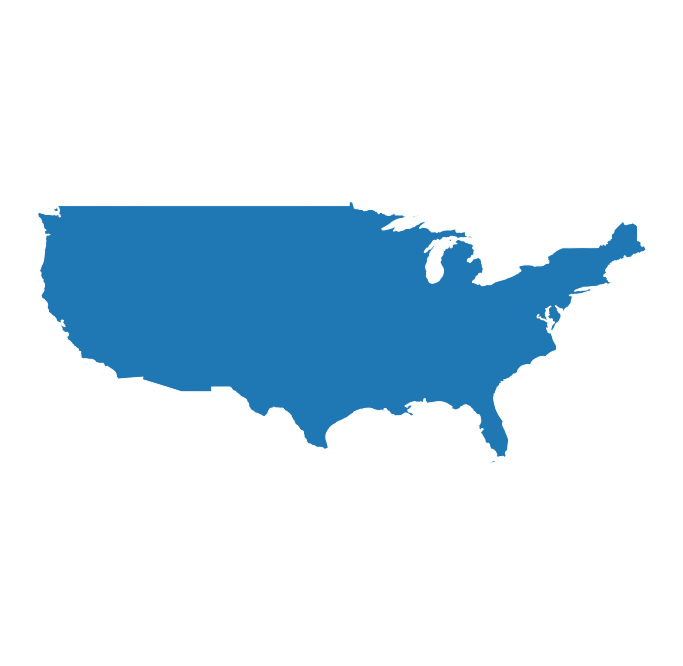

In [9]:
fig, ax = plt.subplots(figsize = (12,12))

cont_usa.reset_index().plot(ax=ax,
                            column='LSAD')
ax.set_axis_off()
plt.axis('equal')
plt.show()

**Dissolve and Aggregate Data**

In [10]:
# Set the columns to be retained in the data

state_bdy = state_bdy_us[['region', 'geometry', 'ALAND', 'AWATER']]

In [11]:
regions_agg = state_bdy.dissolve(by='region', aggfunc='sum')
regions_agg

,geometry,ALAND,AWATER
region,,,
Midwest,"MULTIPOLYGON Z (((-87.80048 42.49192 0.00000, ...",1943869253244,184383393833
Northeast,"MULTIPOLYGON Z (((-76.04621 38.02553 0.00000, ...",869066138232,108922434345
Southeast,"MULTIPOLYGON Z (((-81.81169 24.56874 0.00000, ...",1364632039655,103876652998
Southwest,"POLYGON Z ((-94.48587 33.63787 0.00000, -94.41...",1462631530997,24217682268
West,"MULTIPOLYGON Z (((-104.05325 41.00141 0.00000,...",2432336444730,57568049509


Convert area units from square meters to hectares

In [12]:
regions_agg['land_ha'] = regions_agg['ALAND'] / 10000
regions_agg['water_ha'] = regions_agg['AWATER'] / 10000
regions_agg

,geometry,ALAND,AWATER,land_ha,water_ha
region,,,,,
Midwest,"MULTIPOLYGON Z (((-87.80048 42.49192 0.00000, ...",1943869253244,184383393833,1.943869e+08,1.843834e+07
Northeast,"MULTIPOLYGON Z (((-76.04621 38.02553 0.00000, ...",869066138232,108922434345,8.690661e+07,1.089224e+07
Southeast,"MULTIPOLYGON Z (((-81.81169 24.56874 0.00000, ...",1364632039655,103876652998,1.364632e+08,1.038767e+07
Southwest,"POLYGON Z ((-94.48587 33.63787 0.00000, -94.41...",1462631530997,24217682268,1.462632e+08,2.421768e+06
West,"MULTIPOLYGON Z (((-104.05325 41.00141 0.00000,...",2432336444730,57568049509,2.432336e+08,5.756805e+06


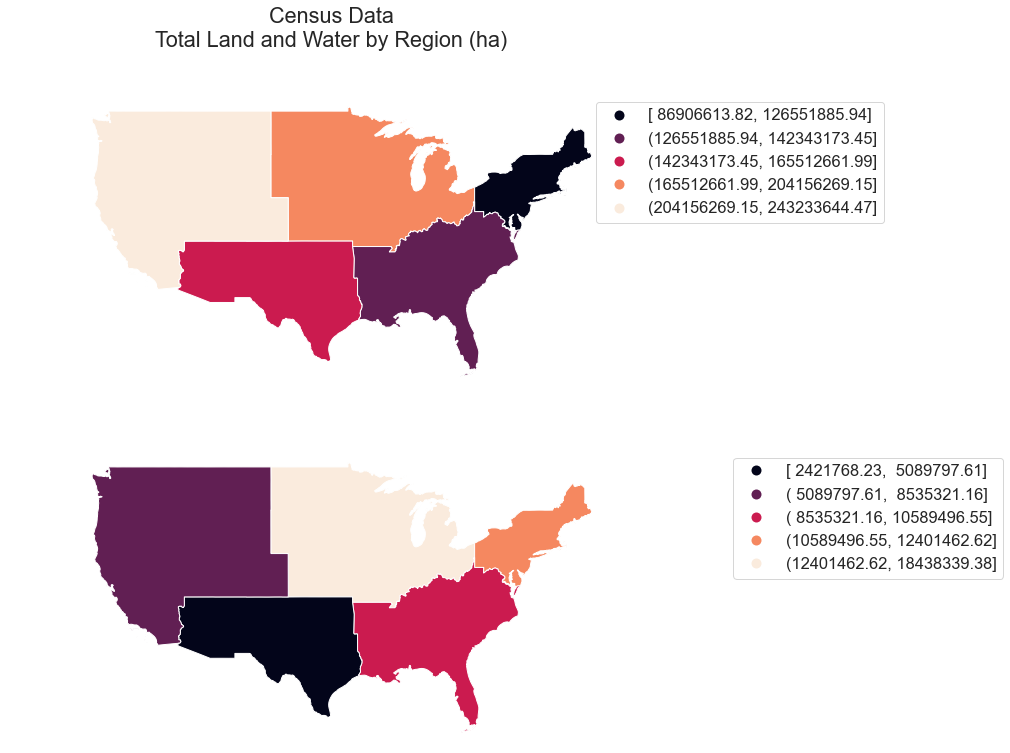

In [17]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,12))
plt.axis('equal')

regions_agg.plot(column='land_ha',
                 legend=True,
                 scheme='quantiles',
                 ax=ax1)

regions_agg.plot(column='water_ha',
                 scheme='quantiles',
                 legend=True,
                 ax=ax2)

plt.suptitle('Census Data\nTotal Land and Water by Region (ha)')
leg = ax1.get_legend()
leg.set_bbox_to_anchor((1.5,1))

leg = ax2.get_legend()
leg.set_bbox_to_anchor((1.5,1))

ax1.set_axis_off()
ax2.set_axis_off()


plt.show()